# 2차원 데이터의 정리

## 두 데이터 사이의 관계를 나타내는 지표
* 영어 점수가 높은 학생일수록 수학 점수도 높은 경향이 있다면, 영어 점수와 수학 점수는 양의 상관관계에 있다고 합니다.
* 반대로 영어 점수가 높은 학생일수록 수학 점수가 낮은 경향이 있다면, 영어 점수와 수학 점수는 음의 상관관계에 있다고 합니다. 
* 혹은 그 어느 쪽에도 해당하지 않고 영어 점수가 수학 점수에 직접적으로 영향을 미치지 않을 때, 영어 점수와 수학 점수는 무상관이라고 합니다. 

In [1]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision', 3)

In [2]:
df = pd.read_csv('./data/ch2_scores_em.csv',
                 index_col='student number')

In [3]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


* 점수의 산점도

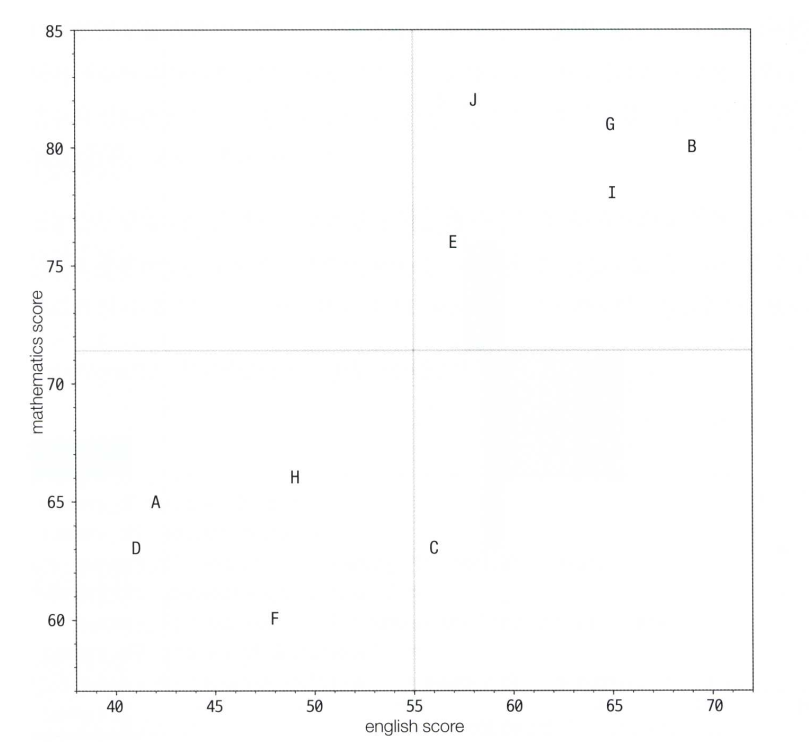

* 영어 점수가 높은 학생일수록 수학 점수도 높은 선형 관계성이 있음
* 영어 점수와 수학 점수는 양의 상관관계에 있다고 말할 수 있음
* 이처럼 양의 상관관계에 있다고 생각되는 데이터의 관계성을 수치화 하는 지표가 공분산(covariance)
* 공분산은 분산에 가까운 지표입니다.

### 공분산의 이해

* 아래 그림은 C, E, H 학생에 대해서 각 점수와 평균 점수로 직사각형을 그린 것 
* 여기서 직사각형의 가로 길이는 영어 점수의 편차, 세로 길이는 수학 점수의 편차

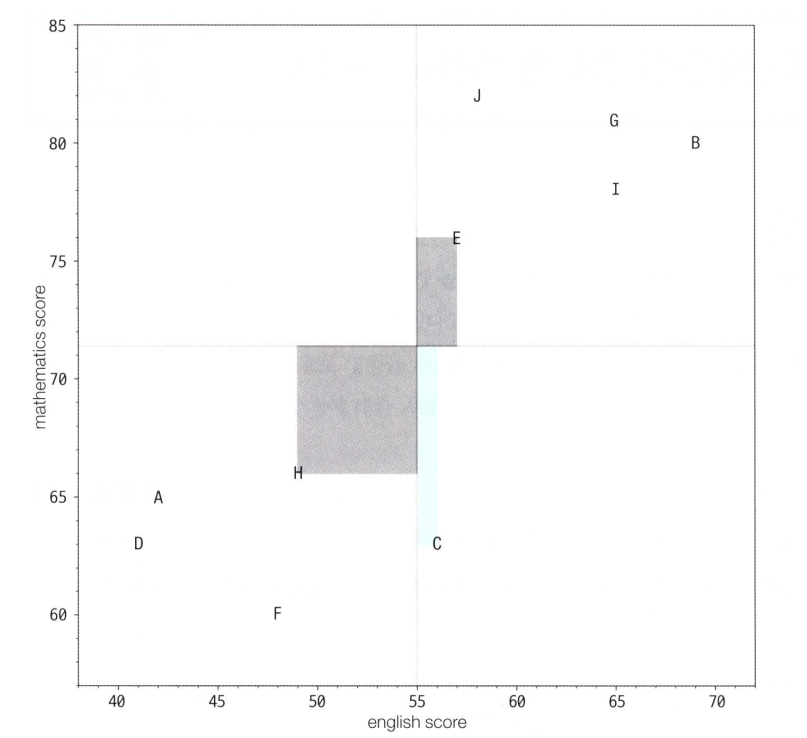

* 공분산이 분산과 다른 점은 가로축과 세로축의 데이터가 다르기 때문에 편차들로 만든 도형이 직사각형이 될 뿐만 아니라 음의 면적도 얻을 수 있다는 점
* 분산은 가령 편차가 음의 값이 되어도 면적은 제곱값이므로 항상 양의 값이 되지만, 공분산은 가로와 세로의 데이터가 다르므로 한쪽은 편차가 양의 값이고, 다른 한쪽은 편차가 음의 값인 경우에 면적이 음의 값이 되어 버립니다.
* E 학생은 면적이 양의 값이지만, C 학생은 면적이 음의 값
* 부호를 붙인 면적이라는 관점에서 면적이 양의 값이 되는 것은 영어 점수와 수학 점수가 모두 평균 점수보다 높거나 평균 점수보다 낮은 경우이 때문에, '점수의 상관관계를 잘 나타낸다'고 볼 수 있음
* 따라서 부호를 붙인 면적의 평균은 상관의 지표가 됩니다. 이것이 공분산

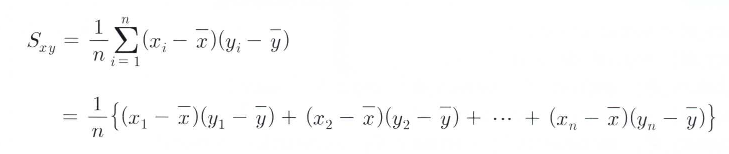

* 공분산이 양의 값이면 면적이 양의 값이 되는 데이터가 많다는 뜻이므로 양의 상관관계가 있고, 
* 반대로 공분산이 음의 값이면 면적이 음의 값이 되는 데이터가 많다는 뜻이므로 음의 상관관계에 있다고 할 수 있음 
* 그 어느쪽도 아니고 공분산이 0에 가까우면 무상관을 나타냄

In [6]:
summary_df = scores_df.copy()
summary_df['english_deviation'] =\ #\(역슬래시) : 줄바꿈 -> 뒤의 코드는 이어진 코드다
    summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] =\
    summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [7]:
summary_df['product of deviations'].mean()

62.800

#### 공분산

* 데이터의 관계성을 수치로 표현하는 정보가 공분산(covariance)입니다.
* 공분산은 분산에 가까운 지표입니다.
* 공분산은 흔히 S_xy로 표기합니다. 변수 x와 변수 y의 공분산임을 나타냅니다.

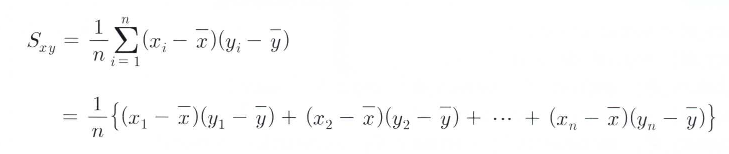

* numpy의 경우, 공분산은 cov함수로 구할 수 있습니다. 다만 반환값은 공분산값이 아닌 공분산 행렬(covariance matrix) 또는 분산공분산 행렬(variance-covariance matrix)라고 부릅니다.

In [5]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat #대각선 : 분산, 역 대각선 : 공분산...?

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [9]:
cov_mat[0, 1], cov_mat[1, 0]

(62.800000000000004, 62.800000000000004)

In [10]:
cov_mat[0, 0], cov_mat[1, 1]

(86.0, 68.44000000000001)

In [11]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.0, 68.44000000000001)

### 상관계수
* 공분산을 계산하여 데이터의 상관관계를 표현
* 같은 시험 점수들 간에 공분산은 (점수 x 점수)라는 단위를 사용
* 학생의 키와 시험 점수의 상관관계를 살펴보면, 공분산 (cm x 점수)라는 단위가 나옵니다.
* 분산의 경우와 마찬가지로 이런 단위는 직감적으로 이해하기 어려운 단점이 존재

* 단위에 의존하지 않는 상관을 나타내는 지표가 필요합니다.
* 공분산은 각 데이터의 단위를 곱한 것이므로, 공분산을 각 데이터의 표준편차로 나누어 단위에 의존하지 않는 지표를 정의

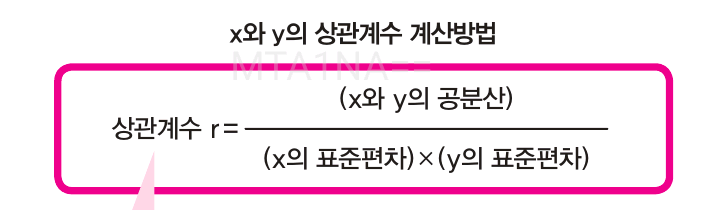

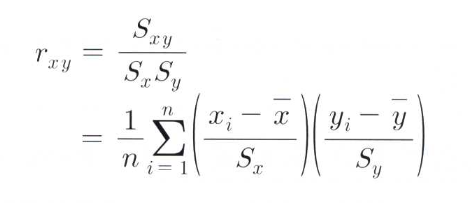

* 위에서 정의된 지표를 상관계수(correlation coefficient)라고 합니다. 
* 상관계수는 반드시 '-1과 1사이의 값'을 취하고, 데이터가 양의 상관관계에 놓여 있을수록 1에 가까워지고, 음의 상관관계에 놓여 있을수록 -1에 가까워집니다. 
* 무상관이면 0이 됩니다. 
* 상관계수가 -1일 때와 1일때에는 데이터가 완전히 직선상에 놓입니다.

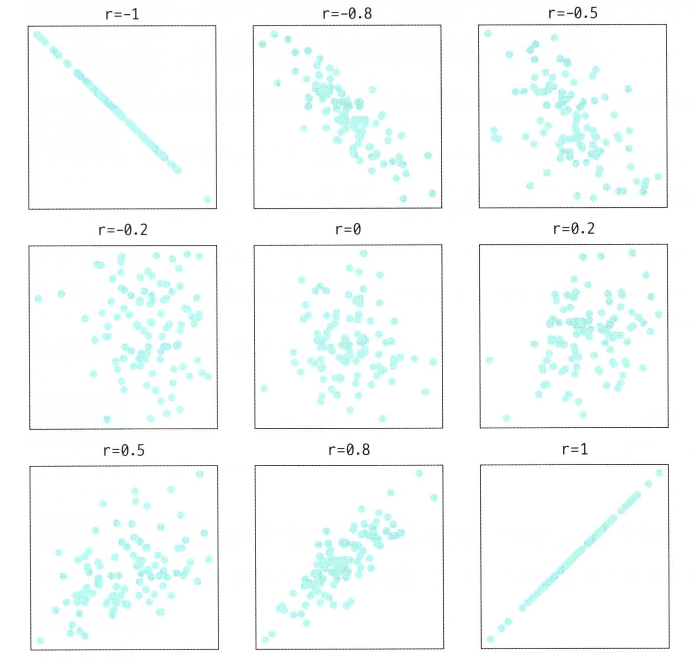

In [12]:
np.cov(en_scores, ma_scores, ddof=0)[0, 1] /\
    (np.std(en_scores) * np.std(ma_scores))

0.8185692341186713

* numpy는 상관계수는 corrcoef함수로 계산 
* 반환값은 공분산의 경우와 마찬가지로 상관행렬(correlation matrix) 형태

In [13]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [14]:
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


#### 상관계수, 이것만은 꼭 알아두자

* 산포도 위에서 기울기 크기는 상관관계에 영향을 주지 않는다.
* 아래의 두 산포도는 키와 몸무게 데이터다. 세로축의 몸무게 단위를 kg에서 g으로 바꾸었기 때문에 직선적인 관계를 보면 기울기 차이가 있지만 상관계수 r 값은 같다 

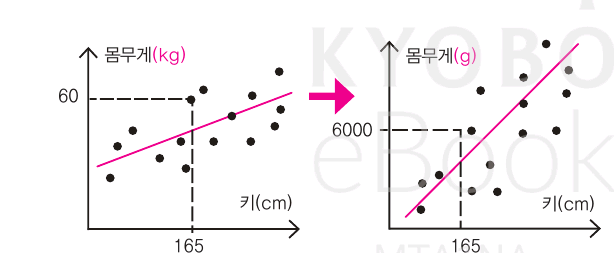

### 상관관계와 인과관계 (면접에서 많이 물어봄)

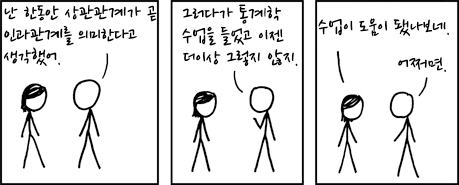

한 연구자가 아이스크림 판매량의 연중 증감 추이를 확인했다. 그리고 연중 익사 사망자의 증감 추이를 함께 놓고 두 변인 간의 상관분석을 시행해 보았다. 결과는 놀라웠다. 무서울 정도로 명백한 상관관계가 나타나고 있었다. 아이스크림 판매량이 급증하는 동안, 익사 사망자 수도 함께 증가하고 있었으며, 판매량이 감소하는 동안 익사 사망자 수도 감소하고 있었던 것이었다.
연구자는 몸서리를 치면서 다음과 같은 결론을 내렸다. "익사 사망자의 증감은 아이스크림이 그 원인이다." -> 인간관계와 상관관계를 헷갈린 경우

## 2차원 데이터의 시각화

### 산점도

In [15]:
import matplotlib.pyplot as plt

%matplotlib inline

* 아래 그림은 가로축이 영어 점수, 세로축이 수학 점수인 산점도(scatter plot)입니다.

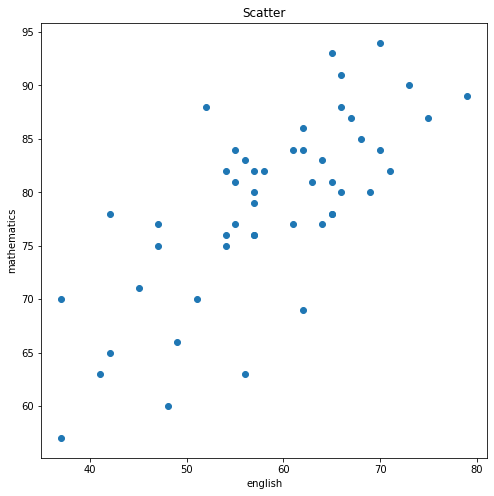

In [17]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
# 산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
plt.title("Scatter")
plt.show()

### 회귀직선
* 회귀직선(regression line)은 두 데이터 사이의 관계를 더욱 잘 나타내는 직선
* matplotlib에는 회귀직선을 직접 그리는 함수가 없기 때문에 여기서는 Numpy를 사용해서 회귀직선을 구함 

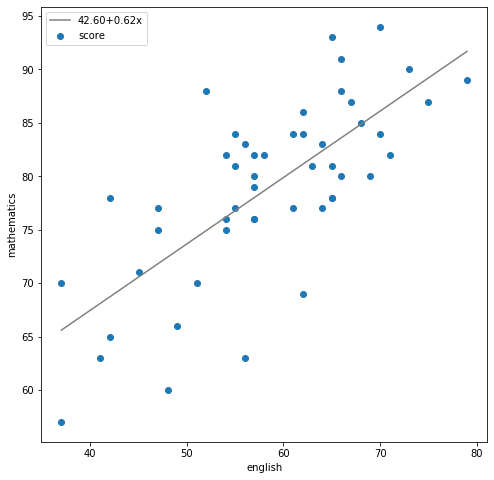

In [21]:
# 계수β_0와β_1를 구한다
poly_fit = np.polyfit(english_scores, math_scores, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(english_scores.min(), english_scores.max())
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
# 범례의 표시
ax.legend(loc='upper left')

plt.show()

### 히트맵
* 히트맵(heat map)은 히스토그램의 2차원 버전으로 색을 이용해 표현할 수 있는 그래프

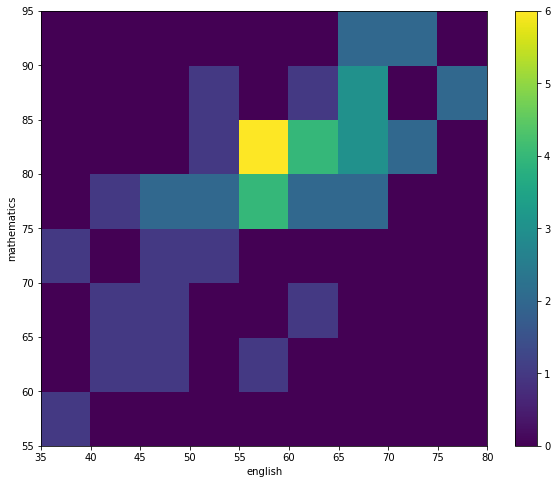

In [22]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
              bins=[9, 8], range=[(35, 80), (55, 95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
# 컬러 바의 표시
fig.colorbar(c[3], ax=ax)
plt.show()

### 앤스컴의 예
* 수치로 데이터를 정리하면 많은 정보를 잃어버릴 수 있으므로 주의해야 함
* 동일해 보이는 지표를 가진 데이터라도 그림으로 나타내면 종종 전혀 다른 데이터가 되곤 함
* 아래의 예처럼 동일한 지표를 가지고 있지만 전혀 다른 데이터가 되는 예로, 앤스컴의 예라고 부르는 데이터를 살펴보겠음
* 기술통계값https://ko.wikipedia.org/wiki/%EC%95%A4%EC%8A%A4%EC%BB%B4_%EC%BD%B0%EB%A5%B4%ED%85%9F

In [26]:
# npy 형식으로 저장된 NumPy array를 읽어들인다
anscombe_data = np.load('./data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

* 각 데이터의 평균, 분산, 상관계수, 회귀직선을 계산하여 DataFrame으로 정리

In [18]:
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean',
                               'Y_variance', 'X&Y_correlation',
                               'X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] =\
        [f'{np.mean(dataX):.2f}',
         f'{np.var(dataX):.2f}',
         f'{np.mean(dataY):.2f}',
         f'{np.var(dataY):.2f}',
         f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
         f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


* 모든 데이터가 평균부터 회귀직선 식까지 전부 일치함
* 결국 지표상으로 보면 이 네 가지 데이터는 모두 동일

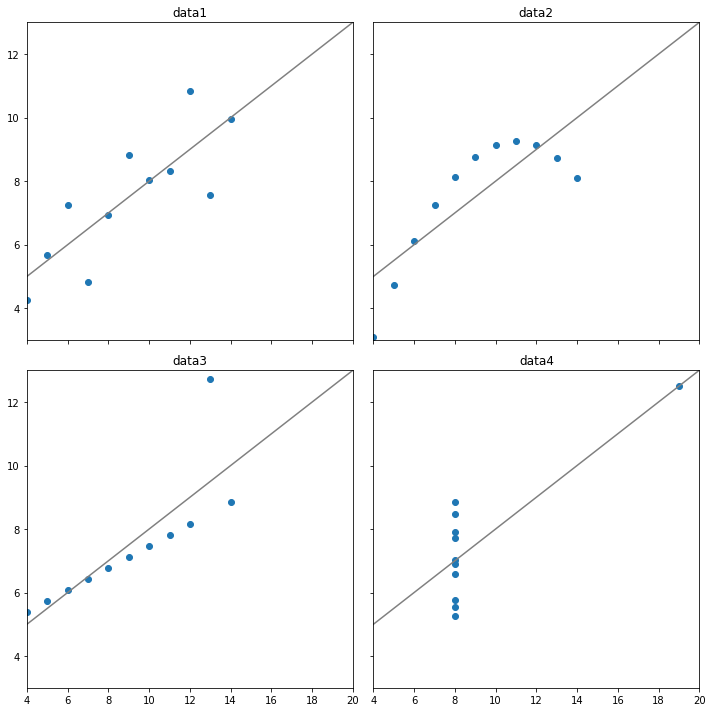

In [19]:
# 그래프를 그리기 위한 영역을 2x2개 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역을 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    # 타이틀을 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')

# 그래프 사이의 간격을 좁힘
plt.tight_layout()
plt.show()

* 그림에서 볼 수 있듯이, 이들 데이터는 전혀 다른 분포를 띠고 있음
* 평균이나 분산이라는 지표가 많은 의미를 갖지만, 이러한 지표들을 과신하면 안됨 
* 앤스컴의 예는 데이터를 분석할 때는 가능하면 그림을 그려야 한다는 것을 알려주고 있음